In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!unzip '/content/drive/MyDrive/eye detection.zip'

Archive:  /content/drive/MyDrive/eye detection.zip
replace Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(742).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(742).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(747).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_(749).jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_100.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_101.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_102.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_103.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_104.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_105.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Diseased/GG_106.jpg  
  inflating: Data_Processed_Paper/Data_Processed_Paper/Disea

In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [56]:
import os
from glob import glob
import tensorflow_hub as hub
from IPython.display import clear_output as cls
from keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 📌 Now apply it to your training dataset
train_generator = datagen.flow_from_directory(
    "/content/Data_Processed_Paper",  
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical'  
)


Found 411 images belonging to 1 classes.


In [58]:
import os
print(os.listdir("/content/Data_Processed_Paper"))


['Data_Processed_Paper']


In [59]:
import os
import shutil

# Define paths
dataset_path = "/content/Data_Processed_Paper"
new_dataset_path = "/content/Data_Processed_Paper_Sorted"

# Create new class folders
os.makedirs(new_dataset_path, exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, "Class_1"), exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, "Class_2"), exist_ok=True)

# Move images manually (Example: First 200 to Class_1, others to Class_2)
all_images = os.listdir(dataset_path)
for i, image in enumerate(all_images):
    if image.endswith(".jpg") or image.endswith(".png"):
        src = os.path.join(dataset_path, image)
        if i < 200:
            dst = os.path.join(new_dataset_path, "Class_1", image)
        else:
            dst = os.path.join(new_dataset_path, "Class_2", image)
        shutil.move(src, dst)

print("✅ Images moved into class folders successfully!")


✅ Images moved into class folders successfully!


In [60]:
train_generator = datagen.flow_from_directory(
    "/content/Data_Processed_Paper_Sorted",  # Updated path
    target_size=(224, 224),  # Match your model input size
    batch_size=32,
    class_mode='categorical'  # Change to 'binary' if only 2 classes
)


Found 0 images belonging to 2 classes.


In [61]:
import os

dataset_path = "/content/Data_Processed_Paper_Sorted"

# Check if class folders exist
print("Class Folders:", os.listdir(dataset_path))

# Check if images exist inside the first class folder
first_class_path = os.path.join(dataset_path, os.listdir(dataset_path)[0])
print("First Class Images:", os.listdir(first_class_path)[:5])  # Show first 5 images


Class Folders: ['Class_2', 'Class_1']
First Class Images: []


In [62]:
import os
import shutil

# Define original and new dataset paths
original_dataset_path = "/content/Data_Processed_Paper"
new_dataset_path = "/content/Data_Processed_Paper_Sorted"

# Ensure the new dataset path exists
os.makedirs(new_dataset_path, exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, "Class_1"), exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, "Class_2"), exist_ok=True)

# Get all images from the original dataset
all_images = [img for img in os.listdir(original_dataset_path) if img.lower().endswith((".jpg", ".jpeg", ".png"))]

# If no images are found, print an error
if not all_images:
    print("❌ No images found in the original dataset folder!")

# Move images into class folders (Example: First half → Class_1, Second half → Class_2)
for i, image in enumerate(all_images):
    src = os.path.join(original_dataset_path, image)
    if i < len(all_images) // 2:
        dst = os.path.join(new_dataset_path, "Class_1", image)
    else:
        dst = os.path.join(new_dataset_path, "Class_2", image)
    shutil.move(src, dst)

print("✅ Images moved successfully! Now check the folders again.")


❌ No images found in the original dataset folder!
✅ Images moved successfully! Now check the folders again.


In [63]:
import os

original_dataset_path = "/content/Data_Processed_Paper"

# List all files inside the folder
print("Files inside Data_Processed_Paper:", os.listdir(original_dataset_path))


Files inside Data_Processed_Paper: ['Data_Processed_Paper']


In [64]:
import os

subfolder_path = "/content/Data_Processed_Paper/Data_Processed_Paper"

# Check if the subfolder exists
if os.path.exists(subfolder_path):
    print("Files inside the subfolder:", os.listdir(subfolder_path))
else:
    print("❌ Subfolder does not exist!")


Files inside the subfolder: ['Healthy', 'Diseased']


In [65]:
train_generator = datagen.flow_from_directory(
    "/content/Data_Processed_Paper/Data_Processed_Paper",  # ✅ Correct path
    target_size=(224, 224),  # Adjust based on your model input size
    batch_size=32,
    class_mode='categorical'
)


Found 411 images belonging to 2 classes.


In [66]:
import os

dataset_path = "/content/Data_Processed_Paper/Data_Processed_Paper"
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}': {len(os.listdir(class_path))} images")


Class 'Healthy': 132 images
Class 'Diseased': 279 images


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    "/content/Data_Processed_Paper/Data_Processed_Paper",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 411 images belonging to 2 classes.


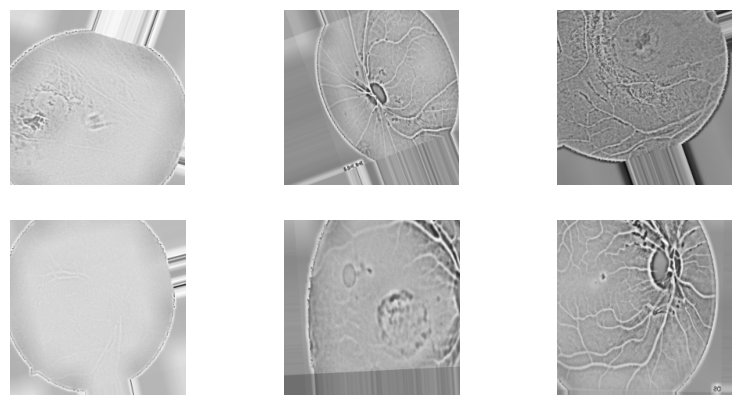

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
# Get a batch of images (Corrected)
sample_batch, _ = next(train_generator)  


# Plot some augmented images
plt.figure(figsize=(10, 5))
for i in range(6):  # Show 6 images
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_batch[i])
    plt.axis("off")
plt.show()


In [70]:
# generators
validation_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/Data_Raw_6class_All',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 411 files belonging to 1 classes.


In [71]:
#normalize
def process(image,label):
 image = tf.cast(image/255.,tf.float32)
 return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [72]:
# CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding= 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.5008e-24
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.8499e-30
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 965ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 6.0498e-35
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 946ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 965ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 954ms/step 

In [77]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

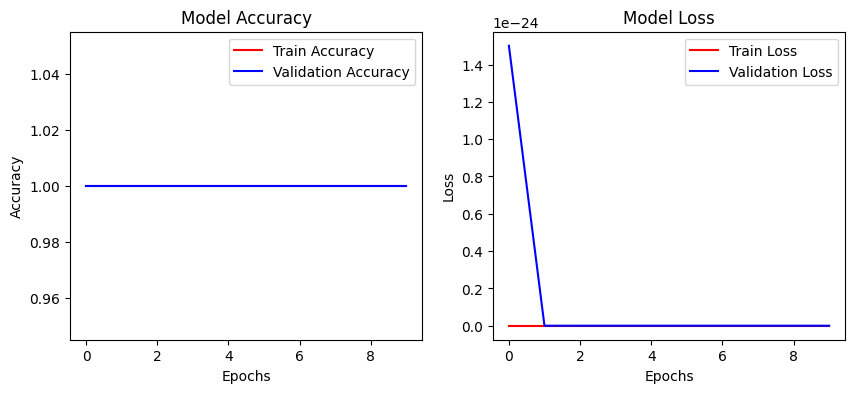

Final Train Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Final Train Loss: 0.0000
Final Validation Loss: 0.0000
✅ No significant overfitting detected.


In [81]:
import matplotlib.pyplot as plt

# Extract values from history
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plot accuracy curves
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, color="red", label="Train Accuracy")
plt.plot(val_accuracy, color="blue", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(train_loss, color="red", label="Train Loss")
plt.plot(val_loss, color="blue", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

# Check for overfitting
final_train_acc = train_accuracy[-1]
final_val_acc = val_accuracy[-1]
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]

overfitting_detected = final_train_acc > final_val_acc + 0.1 and final_val_loss > final_train_loss

print(f"Final Train Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Train Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

if overfitting_detected:
    print("⚠️ Overfitting Detected! The model performs much better on training data than validation data.")
else:
    print("✅ No significant overfitting detected.")


In [82]:
import cv2

In [83]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model


In [84]:
import os
print(os.listdir("/content"))


['.config', 'Data_Processed_Paper_Sorted', 'eye_infection_model.h5', 'Data_Processed_Paper', 'eye_infection_model.keras', 'Data_Raw_6class_All', 'drive', 'sample_data']


In [85]:
import os
print(os.listdir("/content/Data_Processed_Paper"))


['Data_Processed_Paper']


In [86]:
model.save("eye_infection_model.h5")


In [87]:
model.save("eye_infection_model.keras")


In [88]:
from tensorflow.keras.models import load_model
model = load_model("eye_infection_model.keras")


In [89]:
import os
print(os.listdir("/content"))


['.config', 'Data_Processed_Paper_Sorted', 'eye_infection_model.h5', 'Data_Processed_Paper', 'eye_infection_model.keras', 'Data_Raw_6class_All', 'drive', 'sample_data']


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/eye_infection_model.keras"  
model = load_model(model_path)  


In [ ]:
#  Load the trained model (Ensure the correct model file path)
model = load_model("/content/eye_infection_model.keras") 

#  Function to predict infection from a user-given image path
def predict_eye_infection():
    image_path = input("Enter the full image path: ")  

    try:
        #  Load and preprocess the image
        img = load_img(image_path, target_size=(256, 256))  
        img_array = img_to_array(img)  
        img_array = np.expand_dims(img_array, axis=0)  
        img_array = img_array / 255.0  

        #  Make prediction using the model
        prediction = model.predict(img_array)

        #  Display the result
        if prediction[0][0] > 0.5:  # Assuming 1 = Infection, 0 = No Infection
            print("🚨 Prediction: Eye Infection Detected!")
        else:
            print("✅ Prediction: No Infection.")

    except Exception as e:
        print(f"Error: {e}")

#  Call the function to allow the user to test any image
predict_eye_infection()

Enter the full image path: /content/Data_Raw_6class_All/Data_Raw_6class_All/active_inactive/(747).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
✅ Prediction: No Infection.


In [92]:
test_img=cv2.imread('/content/Data_Raw_6class_All/Data_Raw_6class_All/active/114.jpg')

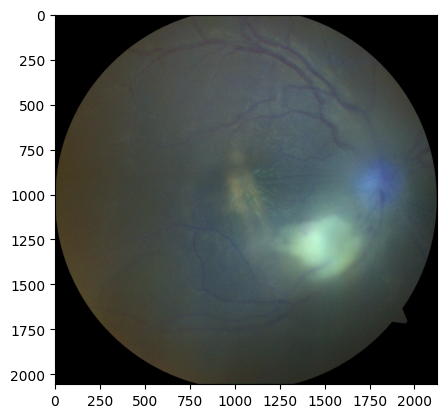

In [93]:
plt.imshow(test_img)

In [94]:
test_img.shape

(2056, 2124, 3)

In [95]:
test_img = cv2.resize(test_img,(256,256))

In [96]:
test_input = test_img.reshape(1,256,256,3)

In [97]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


array([[0.]], dtype=float32)